In [1]:
import warnings
warnings.filterwarnings("ignore")
import pickle as pk
import pandas as pd
import wordcloud as wc
import gensim as gs
import gensim.corpora as cp
import pyLDAvis.gensim
import pyLDAvis
import numpy as np
import  matplotlib.pyplot as plt

In [2]:
covid_date = np.datetime64('2020-04-01T01:00:00.000000+0100')
n_topics = 10

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  """Entry point for launching an IPython kernel.


# WordCloud

In [3]:
def word_cloud(df):
    all_words = ''
    for text in df['text']:
        all_words += ','.join(list(text)) 
        
    print('Total words {}'.format(len(all_words)))
    
    wordcloud = wc.WordCloud(background_color="white", max_words=100000, contour_width=4, scale=3, contour_color='steelblue')
    wordcloud.generate(all_words)
    return wordcloud.to_image()

# LDA

In [4]:
def lda(df, n_topics=5):
    all_words = []
    for text in df['text']:
        all_words.append(text)
    
    # Create dictionary and corpus
    word2num = cp.Dictionary(all_words)
    texts = all_words
    
    # Get term frequency
    corpus = [word2num.doc2bow(text) for text in texts]
    
    lda_model = gs.models.LdaMulticore(corpus=corpus, id2word=word2num, num_topics=n_topics)
    doc_lda = lda_model[corpus]
    
    print('\nTopics')
    print(lda_model.print_topics())
    
    print('\nScores')
    for i in range(0, len(corpus), 500):
        for index, score in sorted(lda_model[corpus[i]], key=lambda tup: -1*tup[1]):
            print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))
    
    pyLDAvis.enable_notebook()
    return pyLDAvis.gensim.prepare(lda_model, corpus, word2num)

def lda_base(df, n_topics=5):
    all_words = []
    for text in df['text']:
        all_words.append(text)
    
    # Create dictionary and corpus
    word2num = cp.Dictionary(all_words)
    texts = all_words
    
    # Get term frequency
    corpus = [word2num.doc2bow(text) for text in texts]
    
    lda_model = gs.models.LdaMulticore(corpus=corpus, id2word=word2num, num_topics=n_topics)
    doc_lda = lda_model[corpus]
    
    print('\nTopics')
    print(lda_model.print_topics())
    
    print('\nScores')
    for i in range(0, len(corpus), 500):
        for index, score in sorted(lda_model[corpus[i]], key=lambda tup: -1*tup[1]):
            print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))
    
    pyLDAvis.enable_notebook()
    return (lda_model, corpus, word2num)

# All

In [5]:
# Need to first get cleaned tokenized text data
uber_df_tk = pd.read_pickle(r'./data/uber_tk.p')
users_df=pd.read_csv('./Scraping/data/uber_users.csv')
#uber_df = pd.read_pickle(r'./Scraping/data/uber.p')

In [6]:
users=set(list(uber_df_tk['source'])+list(uber_df_tk['target']))
users = [user.lower() for user in users]

In [7]:
# from nltk.tokenize import sent_tokenize, word_tokenize
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer

# word_lemmatizer = WordNetLemmatizer()

#Get rid of handles
for i in uber_df_tk.index:
    source=uber_df_tk['source'][i].lower().replace("_","")
    target=uber_df_tk['target'][i].lower().replace("_","")
    text=uber_df_tk['text'][i]
    
    while(source in text):
        index=text.index(source)
        del text[index]
    while(target in text):
        index=text.index(target)
        del text[index] 
    while("uber" in text):
        index=text.index("uber")
        del text[index] 
    while("httpubersupport" in text):
        index=text.index("httpubersupport")
        del text[index] 
    while("ubersupport" in text):
        index=text.index("ubersupport")
        del text[index] 
    uber_df_tk['text'][i]=text

In [8]:
uber_df_tk.groupby(["source",'created_at']).count()

source_id  target  target_id  \
source          created_at                                          
103sanaiqbal    2021-03-31 14:50:01          2       2          2   
123aviraj       2021-03-24 16:23:53          1       1          1   
1975aregr8t     2021-03-27 00:40:54          2       2          2   
                2021-03-27 02:23:36          2       2          2   
1BirdyTheMighty 2019-12-30 21:42:17          1       1          1   
...                                        ...     ...        ...   
yur             2021-03-28 00:06:34          3       3          3   
zaheea01        2021-03-26 04:28:47          1       1          1   
zeeshan90995897 2021-03-30 18:55:47          1       1          1   
                2021-03-30 18:56:32          1       1          1   
zillah7478      2021-03-31 15:00:25          4       4          4   

                                     type_of_content  all_data  text  
source          created_at                                            
103sanaiqbal    2021-03-31 14:50:01                2         2     2  
123aviraj       2021-03-24 16:23:53                1         1     1  
1975aregr8t     2021-03-27 00:40:54                2         2     2  
                2021-03-27 02:23:36                2         2     2  
1BirdyTheMighty 2019-12-30 21:42:17                1         1     1  
...                                              ...       ...   ...  
yur             2021-03-28 00:06:34                3         3     3  
zaheea01        2021-03-26 04:28:47                1         1     1  
zeeshan90995897 2021-03-30 18:55:47                1         1     1  
                2021-03-30 18:56:32                1         1     1  
zillah7478      2021-03-31 15:00:25                4         4     4  

[3951 rows x 6 columns]

In [9]:
users_df

,Unnamed: 0,user,listed,followers
0,0,Michael05914091,0,8
1,1,ShieldVoC,18,17566
2,2,fltrtae,15,1717
3,3,Lucky00890359,0,0
4,4,zhenyalindgardt,1,55
...,...,...,...,...
2573,2573,fayedicksonxo,0,213
2574,2574,Iam_bahuguna,0,90
2575,2575,ajb_neuk,0,3
2576,2576,k_sovs,0,2


In [10]:
import pickle
pickle.dump(uber_df_tk,open('./data/uber_tk.p','wb'))

In [11]:

wcloud = word_cloud(uber_df_tk)

Total words 289077


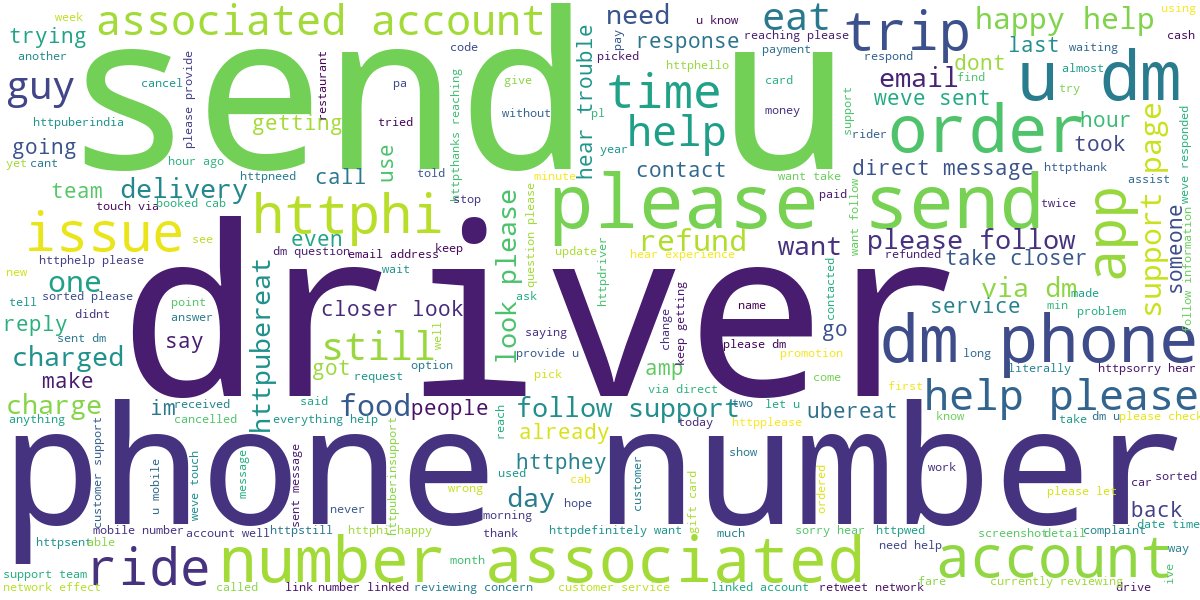

In [12]:
wcloud

In [13]:
agg=pd.read_csv("./data/all_aggregated_uber_results_2.csv")

In [ ]:
lda_model, corpus, word2num=lda_base(uber_df_tk,n_topics)
alltopics=pd.DataFrame()
no_topics=10
for corp in corpus:
    topic_stuff=pd.DataFrame(lda_model[corp])
    topic=topic_stuff.T.iloc[1]
    topic.index=topic_stuff.T.iloc[0]

    actual_topic=topic_stuff.sort_values(by=1).tail(1)
    actual_topic=actual_topic[0][actual_topic.index[0]]
    topic=pd.DataFrame(topic.T).T.reset_index(drop=True)
    topic['Topic']=actual_topic
    # topic=topic_stuff.T.iloc[1].append(pd.Series(actual_topic)).reset_index(drop=True)
    alltopics=alltopics.append(topic,ignore_index=True)


Topics
[(0, '0.059*"http" + 0.026*"dm" + 0.026*"please" + 0.016*"account" + 0.015*"phone" + 0.015*"number" + 0.011*"send" + 0.011*"customer" + 0.011*"associated" + 0.011*"email"'), (1, '0.085*"http" + 0.021*"driver" + 0.019*"order" + 0.018*"help" + 0.015*"hi" + 0.014*"please" + 0.013*"account" + 0.011*"support" + 0.010*"dm" + 0.009*"u"'), (2, '0.081*"http" + 0.029*"please" + 0.025*"dm" + 0.020*"u" + 0.017*"help" + 0.014*"driver" + 0.014*"number" + 0.014*"get" + 0.013*"send" + 0.012*"phone"'), (3, '0.067*"http" + 0.025*"account" + 0.023*"help" + 0.020*"driver" + 0.016*"need" + 0.013*"please" + 0.012*"time" + 0.009*"order" + 0.009*"get" + 0.008*"number"'), (4, '0.076*"http" + 0.025*"driver" + 0.019*"help" + 0.012*"please" + 0.011*"ride" + 0.009*"issue" + 0.009*"account" + 0.009*"response" + 0.009*"dm" + 0.009*"hour"'), (5, '0.077*"http" + 0.022*"please" + 0.020*"dm" + 0.019*"u" + 0.015*"phone" + 0.014*"driver" + 0.014*"send" + 0.014*"sent" + 0.013*"number" + 0.011*"message"'), (6, '0.06

In [ ]:
alltopics=alltopics.fillna(0)

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()
sentiments=[]
for topic in alltopics.index:
    negativity = SIA.polarity_scores(" ".join(uber_df_tk['text'][topic]))['neg']
    sentiments.append(negativity)

In [ ]:
uber_df_tk['sentiments']=sentiments

In [ ]:
convos=[]
for index in uber_df_tk.index:
    convo=" ".join(sorted([uber_df_tk['source'][index],uber_df_tk['target'][index]]))
    convos.append(convo)

In [ ]:
uber_df_tk['Convo']=convos

In [ ]:
unique_convos=set(convos)

In [ ]:
# all_sentdifferences=[]
all_sents=[]
for convo in unique_convos:
    involved=uber_df_tk[uber_df_tk['Convo']==convo].reset_index(drop=True)
#     sent=0
#     sentdifferences=[sent]
    sents=[]
    for i in involved.index:
#         sentdiff = sent-involved['sentiments'][i]
#         sent=involved['sentiments'][i]
#         sentdifferences.append(sentdiff)
        sents.append(involved['sentiments'][i])
    all_sents.append(sents)
#     all_sentdifferences.append(sentdifferences)

In [ ]:
all_sents_df=pd.DataFrame(all_sents)

In [ ]:
convo_sents=pd.DataFrame(zip(unique_convos,all_sents))

In [ ]:
convo_sents[convo_sents[0].str.contains('StlGig')]

In [ ]:
means=all_sents_df.mean()
plt.bar(means.index,means)

In [ ]:
pd.concat([uber_df_tk[['source','target','type_of_content','created_at']],alltopics],axis=1).to_csv("formatted.csv")

In [ ]:
LDAvis_prepared=pyLDAvis.gensim.prepare(lda_model, corpus, word2num)
pyLDAvis.save_html(LDAvis_prepared,'./html/all_lda_n{}.html'.format(n_topics))

# To Uber

In [ ]:
to_uber_df_tk = uber_df_tk[(uber_df_tk['target'] == 'Uber_Support')|(uber_df_tk['target'] == 'UberVirgDetroit')|
                                (uber_df_tk['target'] == 'Uber_India')|(uber_df_tk['target'] == 'UberEats')|
                                (uber_df_tk['target'] == 'Uber_Kolkata')|(uber_df_tk['target'] == 'Uber')|
                                (uber_df_tk['target'] == 'UberUKsupport')|(uber_df_tk['target'] == 'Uber_MEX')|
                                (uber_df_tk['target'] == 'Uber_RSA')|(uber_df_tk['target'] == 'UberINSupport')]

In [ ]:
to_uber_df_tk

In [ ]:
wcloud = word_cloud(to_uber_df_tk)

In [ ]:
wcloud

In [ ]:
LDAvis_prepared = lda(to_uber_df_tk, n_topics=n_topics)

In [ ]:
LDAvis_prepared[3]

In [ ]:
pyLDAvis.save_html(LDAvis_prepared,'./html/to_lda_n{}.html'.format(n_topics))

# From Uber

In [ ]:
from_uber_df_tk = uber_df_tk[(uber_df_tk['source'] == 'Uber_Support')|(uber_df_tk['source'] == 'UberVirgDetroit')|
                                (uber_df_tk['source'] == 'Uber_India')|(uber_df_tk['source'] == 'UberEats')|
                                (uber_df_tk['source'] == 'Uber_Kolkata')|(uber_df_tk['source'] == 'Uber')|
                                (uber_df_tk['source'] == 'UberUKsupport')|(uber_df_tk['source'] == 'Uber_MEX')|
                                (uber_df_tk['source'] == 'Uber_RSA')|(uber_df_tk['source'] == 'UberINSupport')]

In [ ]:
from_uber_df_tk

In [ ]:
wcloud = word_cloud(from_uber_df_tk)

In [ ]:
wcloud

In [ ]:
LDAvis_prepared = lda(from_uber_df_tk, n_topics=n_topics)

In [ ]:
pyLDAvis.save_html(LDAvis_prepared,'./html/from_lda_n{}.html'.format(n_topics))

# To Uber Pre-COVID

In [ ]:
pre_to_uber_df_tk = uber_df_tk[((uber_df_tk['target'] == 'Uber_Support')|(uber_df_tk['target'] == 'UberVirgDetroit')|
                                (uber_df_tk['target'] == 'Uber_India')|(uber_df_tk['target'] == 'UberEats')|
                                (uber_df_tk['target'] == 'Uber_Kolkata')|(uber_df_tk['target'] == 'Uber')|
                                (uber_df_tk['target'] == 'UberUKsupport')|(uber_df_tk['target'] == 'Uber_MEX')|
                                (uber_df_tk['target'] == 'Uber_RSA')|(uber_df_tk['target'] == 'UberINSupport')
                               ) & (uber_df_tk['created_at'] <= covid_date)]

In [ ]:
wcloud = word_cloud(pre_to_uber_df_tk)

In [ ]:
wcloud

In [ ]:
LDAvis_prepared = lda(pre_to_uber_df_tk, n_topics=n_topics)

In [ ]:
LDAvis_prepared

In [ ]:
pyLDAvis.save_html(LDAvis_prepared,'./html/pre_to_lda_n{}.html'.format(n_topics))

# To Uber Post-COVID

In [ ]:
post_to_uber_df_tk = uber_df_tk[(uber_df_tk['target'] == 'Uber_Support')|(uber_df_tk['target'] == 'UberVirgDetroit')|
                                (uber_df_tk['target'] == 'Uber_India')|(uber_df_tk['target'] == 'UberEats')|
                                (uber_df_tk['target'] == 'Uber_Kolkata')|(uber_df_tk['target'] == 'Uber')|
                                (uber_df_tk['target'] == 'UberUKsupport')|(uber_df_tk['target'] == 'Uber_MEX')|
                                (uber_df_tk['target'] == 'Uber_RSA')|(uber_df_tk['target'] == 'UberINSupport') & (uber_df_tk['created_at'] > covid_date)]

In [ ]:
post_to_uber_df_tk

In [ ]:
wcloud = word_cloud(from_uber_df_tk)

In [ ]:
wcloud

In [ ]:
LDAvis_prepared = lda(post_to_uber_df_tk, n_topics=n_topics)

In [ ]:
LDAvis_prepared

In [ ]:
pyLDAvis.save_html(LDAvis_prepared,'./html/post_to_lda_n{}.html'.format(n_topics))

# From Uber Pre-COVID

In [ ]:
pre_from_uber_df_tk = uber_df_tk[(uber_df_tk['source'] == 'Uber_Support') & (uber_df_tk['created_at'] <= covid_date)]

In [ ]:
pre_from_uber_df_tk

In [ ]:
wcloud = word_cloud(pre_from_uber_df_tk)

In [ ]:
wcloud

In [ ]:
LDAvis_prepared = lda(pre_from_uber_df_tk, n_topics=n_topics)

In [ ]:
LDAvis_prepared

In [ ]:
pyLDAvis.save_html(LDAvis_prepared,'./html/pre_from_lda_n{}.html'.format(n_topics))

# From Uber Post-COVID

In [ ]:
post_from_uber_df_tk = uber_df_tk[(uber_df_tk['source'] == 'Uber_Support')|(uber_df_tk['source'] == 'UberVirgDetroit')|
                                (uber_df_tk['source'] == 'Uber_India')|(uber_df_tk['source'] == 'UberEats')|
                                (uber_df_tk['source'] == 'Uber_Kolkata')|(uber_df_tk['source'] == 'Uber')|
                                (uber_df_tk['source'] == 'UberUKsupport')|(uber_df_tk['source'] == 'Uber_MEX')|
                                (uber_df_tk['source'] == 'Uber_RSA')|(uber_df_tk['source'] == 'UberINSupport') & (uber_df_tk['created_at'] > covid_date)]

In [ ]:
post_from_uber_df_tk

In [ ]:
wcloud = word_cloud(post_from_uber_df_tk)

In [ ]:
wcloud

In [ ]:
LDAvis_prepared = lda(post_from_uber_df_tk, n_topics=n_topics)

In [ ]:
LDAvis_prepared

In [ ]:
pyLDAvis.save_html(LDAvis_prepared,'./html/post_from_lda_n{}.html'.format(n_topics))

# Pre-COVID

In [ ]:
pre_uber_df_tk = uber_df_tk[uber_df_tk['created_at'] <= covid_date]

In [ ]:
pre_uber_df_tk

In [ ]:
wcloud = word_cloud(pre_uber_df_tk)

In [ ]:
wcloud

In [ ]:
LDAvis_prepared = lda(pre_uber_df_tk, n_topics=n_topics)

In [ ]:
LDAvis_prepared

In [ ]:
pyLDAvis.save_html(LDAvis_prepared,'./html/pre_lda_n{}.html'.format(n_topics))

# Post-COVID

In [ ]:
post_uber_df_tk = uber_df_tk[uber_df_tk['created_at'] > covid_date]

In [ ]:
post_uber_df_tk

In [ ]:
wcloud = word_cloud(post_uber_df_tk)

In [ ]:
wcloud

In [ ]:
LDAvis_prepared = lda(post_uber_df_tk, n_topics=n_topics)

In [ ]:
LDAvis_prepared

In [ ]:
pyLDAvis.save_html(LDAvis_prepared,'./html/post_lda_n{}.html'.format(n_topics))